In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [ ]:

datPath = "/Users/whysocurious/Documents/MLDSAIProjects/BigMartSalesPred_Hackathon/data"

train = pd.read_csv(datPath+'/raw/train_v9rqX0R.csv')
test = pd.read_csv(datPath+'/raw/test_AbJTz2l.csv')

# dfpred = pd.read_csv(datPath+'/processed/train_predicted.csv')
dfpred = pd.read_csv(datPath+'/processed/train_predictions_analysis.csv')

print (train.shape, test.shape, dfpred.shape)

(8523, 12) (5681, 11) (8523, 13)


In [31]:
dfpred.columns

Index(['Item_Identifier', 'Outlet_Identifier', 'Outlet_Type', 'Item_MRP_Bins',
       'Actual_Sales', 'pred_outlet_type', 'pred_outlet_identifier',
       'pred_mrp_bins', 'pred_combined', 'residual_outlet_type',
       'residual_outlet_identifier', 'residual_mrp_bins', 'residual_combined'],
      dtype='object')

(8019, 14)


count    8019.000000
mean        0.563057
std         0.862279
min         0.000356
25%         0.145109
50%         0.306366
75%         0.544522
max         7.649408
Name: AbsPercError, dtype: float64

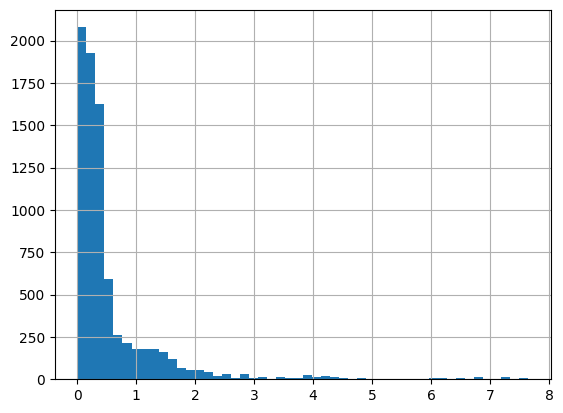

In [32]:
dfpred = dfpred.merge(train[['Item_Identifier', 'Item_MRP']], on='Item_Identifier', how='left').drop_duplicates(subset=['Item_Identifier', 'Item_MRP'])
print (dfpred.shape)
dfpred['AbsPercError'] = np.abs(dfpred['residual_mrp_bins']) / dfpred['Actual_Sales']
dfpred['AbsPercError'].hist(bins=50)
dfpred['AbsPercError'].describe()

In [46]:
dfpred['Item_MRP_Bins'] = pd.cut(dfpred['Item_MRP'], bins=[dfpred['Item_MRP'].min(),50,120,175,dfpred['Item_MRP'].max()], labels=False)
dfpred.pivot_table(index='Item_MRP_Bins', values='AbsPercError', aggfunc=['mean', 'std', 'count'])

,mean,std,count
,AbsPercError,AbsPercError,AbsPercError
Item_MRP_Bins,,,
0.0,0.503068,0.669772,709
1.0,0.546495,0.783678,2562
2.0,0.600545,1.059659,2205
3.0,0.564143,0.790973,2542


count    8523.000000
mean       46.226168
std        66.744250
min         0.000000
25%        13.860000
50%        29.670000
75%        48.890000
max       763.650000
Name: AbsPercError, dtype: float64

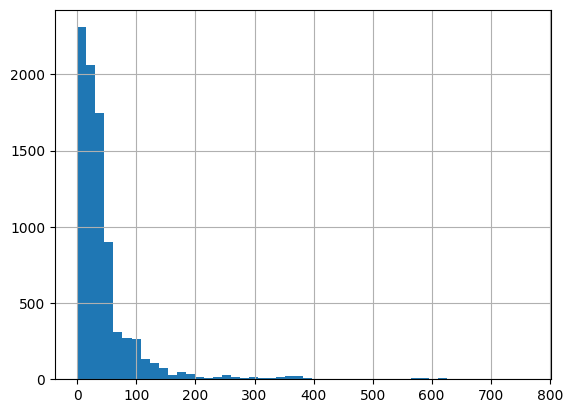

In [3]:
dfpred['AbsPercError'] = np.round(100 * np.abs(dfpred['Pred_Item_Outlet_Sales'] - dfpred['Item_Outlet_Sales']) / dfpred['Item_Outlet_Sales'], 2)
dfpred['AbsPercError'].hist(bins=50)
dfpred['AbsPercError'].describe()

In [4]:
dfpred.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Low_Fat_Flag', 'Outlet_Age',
       'Outlet_Age_Squared', 'Item_MRP_Bins', 'Price_Per_Unit_Visibility',
       'Item_Type_Outlet_Count', 'Outlet_Total_Visibility',
       'Items_In_Same_Category', 'Category_Visibility_Share',
       'Item_Price_Rank_In_Category', 'Cheaper_Alternatives_Count',
       'Price_Ratio_To_Category_Avg', 'Visibility_Ratio_To_Category_Avg',
       'Unique_Categories_In_Outlet', 'Outlet_Premium_Ratio',
       'Outlet_Low_Fat_Ratio', 'Is_Tier1_Supermarket',
       'Large_Outlet_Premium_Item', 'Drinks_In_Grocery', 'Complement_Group',
       'Complement_Group_Items_Count', 'Complement_Group_Visibility',
       'Item_Weight_To_MRP_Ratio', 'Visibility_Per_Dollar',
       'Above_Avg_Visibility_In_Category', 'Outlet_Type_

In [67]:
dfpred['Item_MRP_Bins'] = pd.cut(dfpred['Item_MRP'], bins=[dfpred['Item_MRP'].min(),45,115,185,dfpred['Item_MRP'].max()], labels=False)
dfpred.pivot_table(index='Item_MRP_Bins', values='AbsPercError', aggfunc=['mean', 'std', 'count'])

,mean,std,count
,AbsPercError,AbsPercError,AbsPercError
Item_MRP_Bins,,,
0.0,48.468937,62.898750,527
1.0,45.244198,64.820838,2701
2.0,45.798124,66.443882,3124
3.0,47.540793,70.364484,2170


In [25]:
dfpred.pivot_table(index='Item_MRP_Bins', values='Item_Outlet_Sales', aggfunc=['mean', 'std', 'count'])

,mean,std,count
,Item_Outlet_Sales,Item_Outlet_Sales,Item_Outlet_Sales
Item_MRP_Bins,,,
0.0,615.309286,379.760842,756
1.0,1381.977154,897.101485,2721
2.0,2575.705425,1608.679951,3906
3.0,3778.742347,2159.209430,1139


In [26]:
dfpred.pivot_table(index='Item_MRP_Bins', values='AbsPercError', aggfunc=['mean', 'std', 'count'])

,mean,std,count
,AbsPercError,AbsPercError,AbsPercError
Item_MRP_Bins,,,
0.0,46.524392,58.282197,756
1.0,45.749394,65.613397,2721
2.0,46.083922,67.959489,3906
3.0,47.694671,70.454054,1139


In [7]:
dfpred.Item_MRP.describe()

count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64

<Axes: >

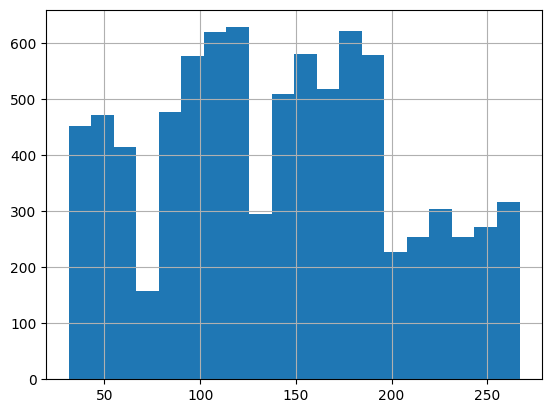

In [8]:
dfpred.Item_MRP.hist(bins=20)

In [8]:
dfpred['Item_MRP_Bins'] = pd.qcut(dfpred['Item_MRP'], q=4, duplicates='drop')
dfpred['Item_MRP_Bins'].value_counts()

Item_MRP_Bins
(31.288999999999998, 93.826]    2131
(93.826, 143.013]               2131
(185.644, 266.888]              2131
(143.013, 185.644]              2130
Name: count, dtype: int64

In [10]:
pd.crosstab(dfpred['Item_MRP_Bins'], dfpred['Outlet_Identifier'])

Outlet_Identifier,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
Item_MRP_Bins,,,,,,,,,,
"(31.288999999999998, 93.826]",138,239,241,229,137,241,211,231,235,229
"(93.826, 143.013]",136,232,231,248,124,222,240,235,222,241
"(143.013, 185.644]",143,218,233,208,142,247,240,228,232,239
"(185.644, 266.888]",138,243,221,243,125,225,239,235,241,221


In [6]:
pd.crosstab(dfpred['Outlet_Identifier'], dfpred['Outlet_Type'])

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Identifier,,,,
OUT010,555,0,0,0
OUT013,0,932,0,0
OUT017,0,926,0,0
OUT018,0,0,928,0
OUT019,528,0,0,0
OUT027,0,0,0,935
OUT035,0,930,0,0
OUT045,0,929,0,0
OUT046,0,930,0,0


In [37]:
tmpdf1 = dfpred.loc[(dfpred['AbsPercError'] > 100)|(dfpred['AbsPercError'] < 5), ['Item_Identifier','Item_Weight','Item_Visibility',
                                          'Outlet_Size', 'Outlet_Location_Type','Outlet_Type',
                                          'Item_Avg_Sales','Outlet_Avg_Sales','Pred_Item_Outlet_Sales','Item_Outlet_Sales','AbsPercError']].sort_values(by='AbsPercError', ascending=False)#.head(20)
pd.concat([tmpdf1.head(10),tmpdf1.tail(10)], axis=0)

,Item_Identifier,Item_Weight,Item_Visibility,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Avg_Sales,Outlet_Avg_Sales,Pred_Item_Outlet_Sales,Item_Outlet_Sales,AbsPercError
1325,FDN56,5.460,0.107037,Small,Tier 2,Supermarket Type1,2781.213050,2438.841866,2405.041176,288.9572,732.32
8149,FDK58,11.350,0.065776,Small,Tier 1,Supermarket Type1,1796.328400,2277.844267,1542.852160,202.4032,662.27
239,NCU05,11.800,0.058452,Medium,Tier 3,Supermarket Type3,1033.876433,3694.038558,1812.057000,241.6854,649.76
4440,FDQ09,7.235,0.058084,High,Tier 3,Supermarket Type1,1996.512267,2298.995256,1692.918832,230.3668,634.88
6726,FDF34,9.300,0.014041,Medium,Tier 1,Supermarket Type1,2777.717600,2348.354635,2724.218077,396.8168,586.52
895,FDB15,10.895,0.136811,Small,Tier 1,Supermarket Type1,3879.521486,2277.844267,3616.223228,527.3136,585.78
1223,FDK38,6.650,0.053398,Small,Tier 2,Supermarket Type1,2227.101000,2192.384798,2025.807719,296.9468,582.21
5048,FDS56,5.785,0.038817,Medium,Tier 1,Supermarket Type1,3628.831933,2348.354635,3558.350170,524.6504,578.23
3843,FDU34,18.250,0.075501,Medium,Tier 3,Supermarket Type2,2276.655543,1995.498739,1676.518224,249.0092,573.28
6426,NCO02,11.150,0.073667,Medium,Tier 3,Supermarket Type2,1285.326900,1995.498739,884.789048,131.8284,571.17


In [54]:
dfpred[['Item_Outlet_Sales','Pred_Item_Outlet_Sales']].describe()

,Item_Outlet_Sales,Pred_Item_Outlet_Sales
count,8523.000000,8523.000000
mean,2181.288914,1998.696659
std,1706.499616,1324.125682
min,33.290000,59.919423
25%,834.247400,955.456668
50%,1794.331000,1861.513268
75%,3101.296400,2792.929298
max,13086.964800,8296.342114


In [39]:
dfpred['Sales_Bin'] = pd.qcut(dfpred['Item_Outlet_Sales'], 
                                q=[0, 0.1, 0.25, 0.5, 0.75, 0.9, 1.0],
                                labels=['Very Low', 'Low', 'Med-Low', 'Medium', 'Med-High', 'High'])
dfpred.pivot_table(index='Sales_Bin', values='AbsPercError', aggfunc=['median','mean','std','count']).sort_values(by=('median', 'AbsPercError'), ascending=False)

/var/folders/8x/4tbqnfzd0tz4gn4chf6rr2ch0000gp/T/ipykernel_4965/845690312.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  dfpred.pivot_table(index='Sales_Bin', values='AbsPercError', aggfunc=['median','mean','std','count']).sort_values(by=('median', 'AbsPercError'), ascending=False)
/var/folders/8x/4tbqnfzd0tz4gn4chf6rr2ch0000gp/T/ipykernel_4965/845690312.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  dfpred.pivot_table(index='Sales_Bin', values='AbsPercError', aggfunc=['median','mean','std','count']).sort_values(by=('median', 'AbsPercError'), ascending=False)
/var/folders/8x/4tbqnfzd0tz4gn4chf6rr2ch0000gp/T/ipykernel_4965/845690312.py:4: FutureWarning: T

,median,mean,std,count
,AbsPercError,AbsPercError,AbsPercError,AbsPercError
Sales_Bin,,,,
Very Low,66.35,85.627174,105.925796,860
Low,33.73,63.946554,87.329821,1271
High,28.66,28.809271,14.969619,851
Med-Low,28.12,39.809930,40.578988,2134
Med-High,21.97,23.705904,15.209978,1277
Medium,20.02,23.820704,18.525623,2130



Outlet_Type Error Analysis:
                        mean  median  count
Outlet_Type                                
Supermarket Type2  47.262112   28.14    928
Grocery Store      42.846833   37.18   1083
Supermarket Type1  42.018268   28.03   5577
Supermarket Type3  22.244727   15.03    935


<Figure size 1000x600 with 0 Axes>

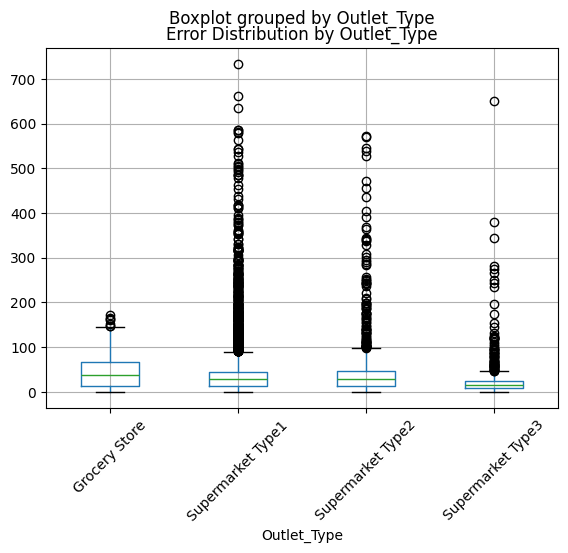


Outlet_Size Error Analysis:
                  mean  median  count
Outlet_Size                          
High         46.424753   28.72    932
Small        41.548583   28.98   4798
Medium       36.798815   21.74   2793


<Figure size 1000x600 with 0 Axes>

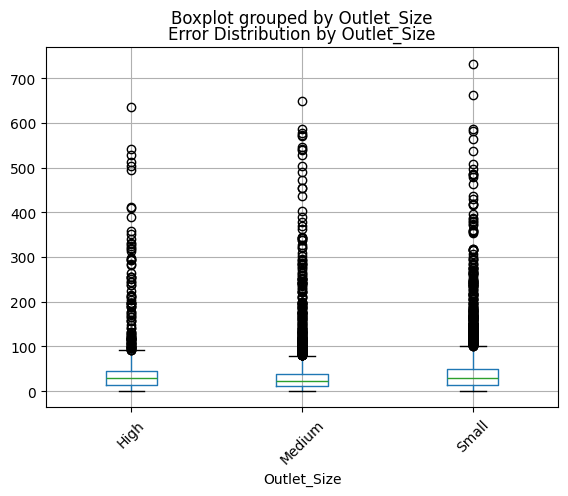


Outlet_Location_Type Error Analysis:
                           mean  median  count
Outlet_Location_Type                          
Tier 1                42.618346   28.98   2388
Tier 2                40.326409   27.96   2785
Tier 3                39.198627   22.98   3350


<Figure size 1000x600 with 0 Axes>

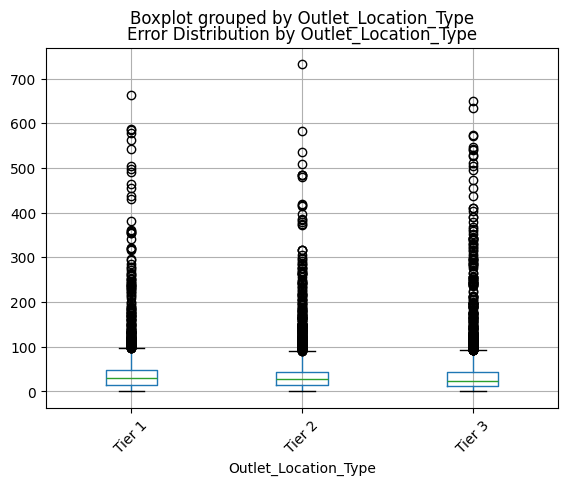


Item_Type Error Analysis:
                            mean  median  count
Item_Type                                      
Seafood                44.006875  27.585     64
Breakfast              42.955545  28.025    110
Snack Foods            42.619058  28.125   1200
Health and Hygiene     41.754404  25.420    520
Meat                   41.509906  23.780    425
Fruits and Vegetables  40.978985  26.335   1232
Household              40.778571  25.795    910
Others                 40.347751  25.600    169
Baking Goods           40.339769  27.620    648
Starchy Foods          40.301284  27.795    148
Canned                 40.241495  26.030    649
Frozen Foods           39.946939  27.705    856
Dairy                  39.653739  25.150    682
Soft Drinks            37.716337  26.040    445
Breads                 36.425857  26.790    251
Hard Drinks            35.320935  26.945    214


<Figure size 1000x600 with 0 Axes>

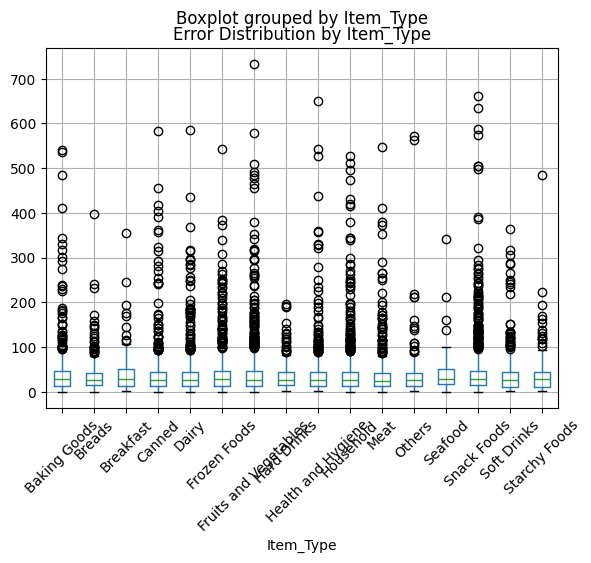


Item_Fat_Content Error Analysis:
                       mean  median  count
Item_Fat_Content                          
Regular           40.780303  26.935   3006
Low Fat           40.386346  26.050   5517


<Figure size 1000x600 with 0 Axes>

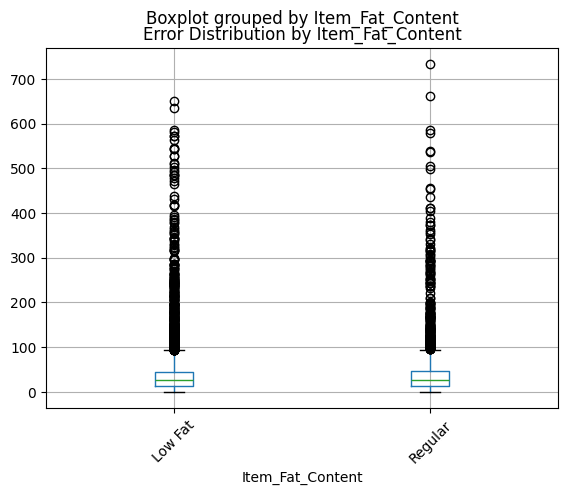


Item_MRP_Bins Error Analysis:
                    mean  median  count
Item_MRP_Bins                          
Very_Low       42.177900  27.850    757
Premium        42.161632  27.840   1440
Medium         41.319647  26.340   2210
Low            39.559661  25.295   1682
High           38.989265  25.555   2434


<Figure size 1000x600 with 0 Axes>

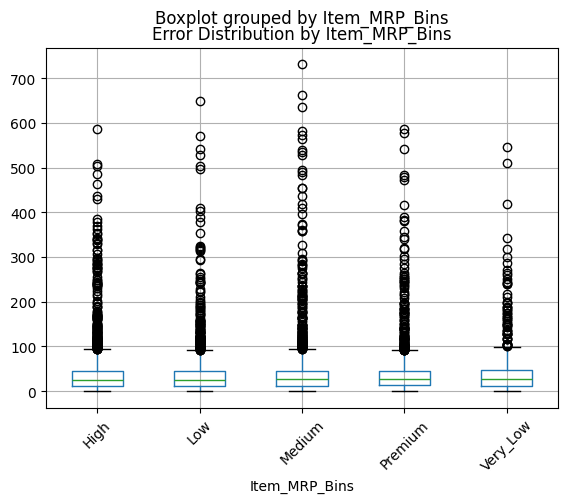

In [43]:
categorical_vars = ['Outlet_Type', 'Outlet_Size', 'Outlet_Location_Type', 
                   'Item_Type', 'Item_Fat_Content', 'Item_MRP_Bins']

for var in categorical_vars:
    error_summary = dfpred.groupby(var)['AbsPercError'].agg(['mean', 'median', 'count'])
    print(f"\n{var} Error Analysis:")
    print(error_summary.sort_values('mean', ascending=False))
    
    # Visual analysis
    plt.figure(figsize=(10, 6))
    dfpred.boxplot(column='AbsPercError', by=var)
    plt.xticks(rotation=45)
    plt.title(f'Error Distribution by {var}')
    plt.show()

/var/folders/8x/4tbqnfzd0tz4gn4chf6rr2ch0000gp/T/ipykernel_4965/872519736.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  error_by_bin = dfpred.groupby(f'{feature}_Bin')['AbsPercError'].mean()


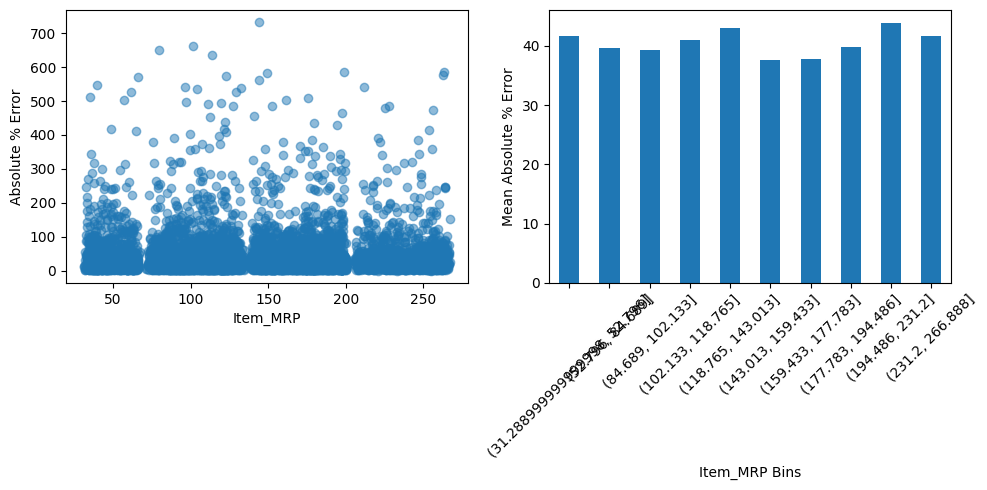

/var/folders/8x/4tbqnfzd0tz4gn4chf6rr2ch0000gp/T/ipykernel_4965/872519736.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  error_by_bin = dfpred.groupby(f'{feature}_Bin')['AbsPercError'].mean()


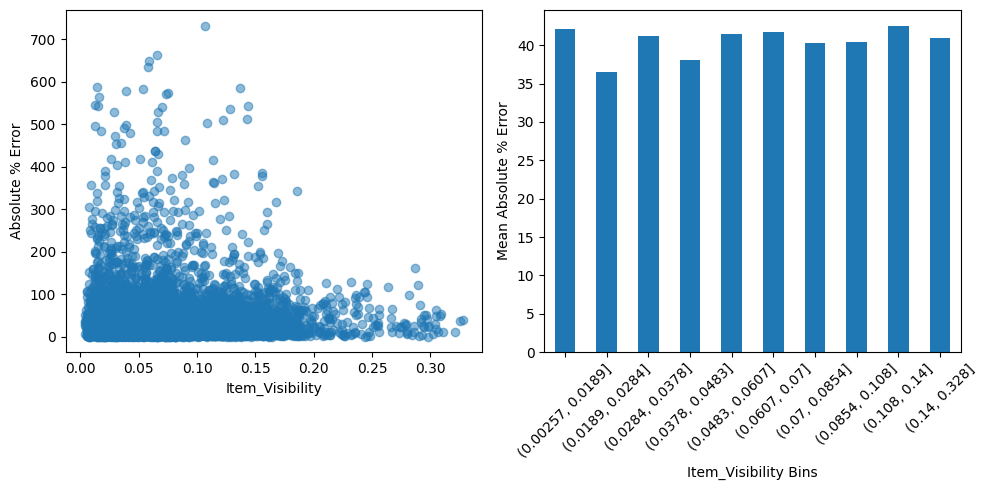

/var/folders/8x/4tbqnfzd0tz4gn4chf6rr2ch0000gp/T/ipykernel_4965/872519736.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  error_by_bin = dfpred.groupby(f'{feature}_Bin')['AbsPercError'].mean()


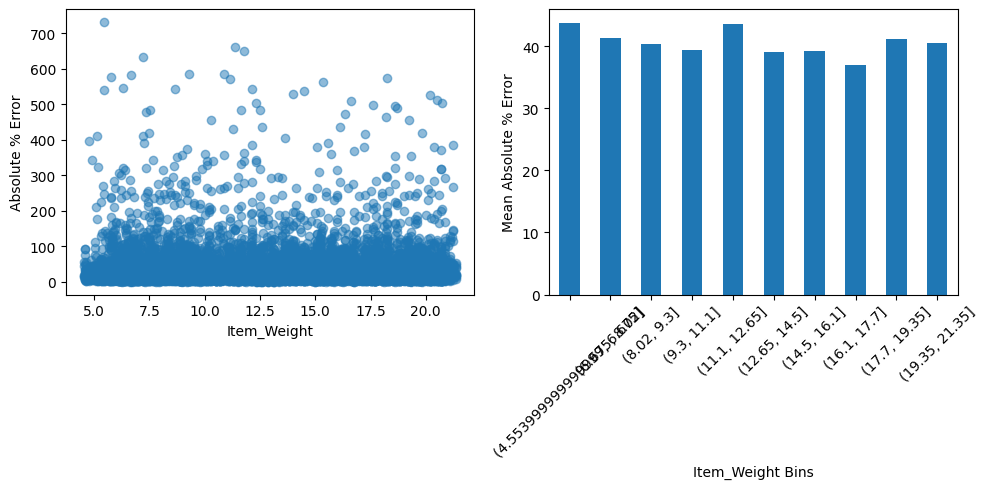

/var/folders/8x/4tbqnfzd0tz4gn4chf6rr2ch0000gp/T/ipykernel_4965/872519736.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  error_by_bin = dfpred.groupby(f'{feature}_Bin')['AbsPercError'].mean()


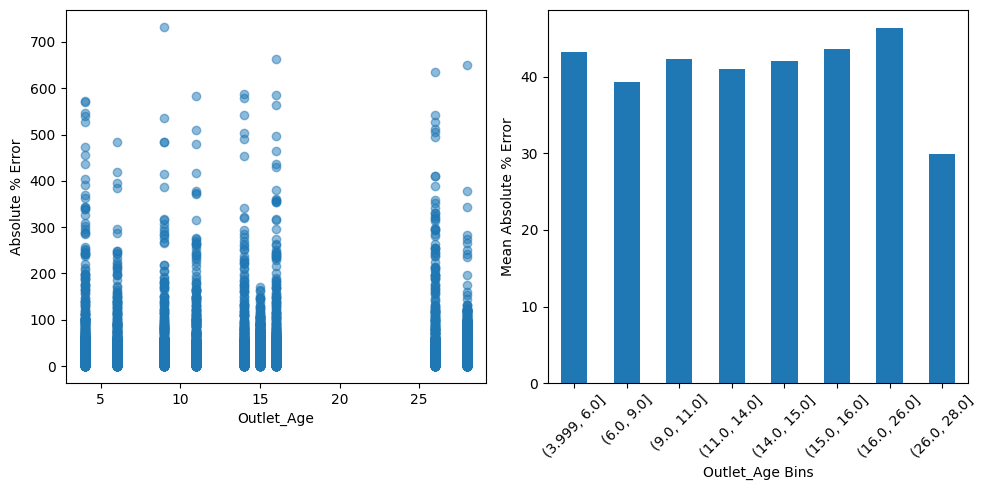

/var/folders/8x/4tbqnfzd0tz4gn4chf6rr2ch0000gp/T/ipykernel_4965/872519736.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  error_by_bin = dfpred.groupby(f'{feature}_Bin')['AbsPercError'].mean()


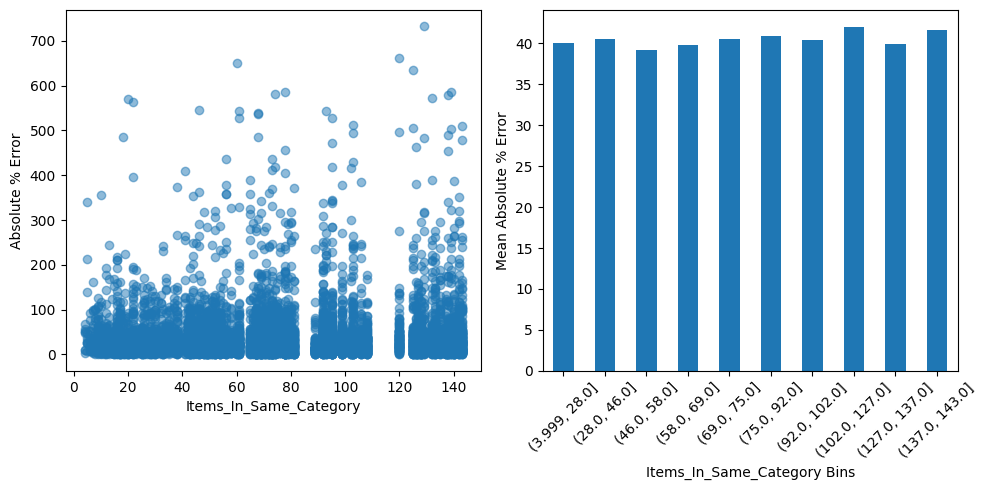

/var/folders/8x/4tbqnfzd0tz4gn4chf6rr2ch0000gp/T/ipykernel_4965/872519736.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  error_by_bin = dfpred.groupby(f'{feature}_Bin')['AbsPercError'].mean()


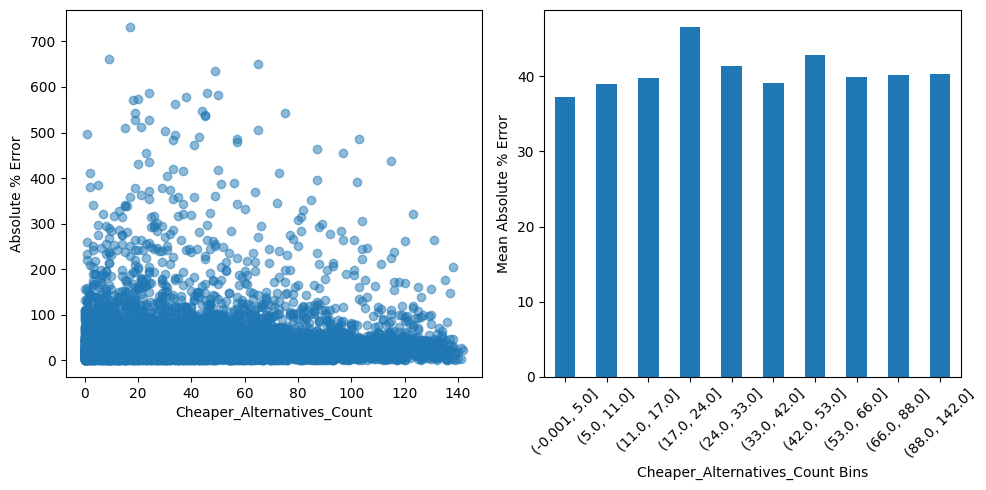

In [45]:
# Correlation of errors with numerical features
numerical_features = ['Item_MRP', 'Item_Visibility', 'Item_Weight', 
                     'Outlet_Age', 'Items_In_Same_Category', 
                     'Cheaper_Alternatives_Count']

error_correlations = {}
for feature in numerical_features:
    # Bin the feature and calculate error stats
    dfpred[f'{feature}_Bin'] = pd.qcut(dfpred[feature], q=10, duplicates='drop')
    error_by_bin = dfpred.groupby(f'{feature}_Bin')['AbsPercError'].mean()
    
    # Calculate correlation
    error_correlations[feature] = dfpred[feature].corr(dfpred['AbsPercError'])
    
    # Plot relationship
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.scatter(dfpred[feature], dfpred['AbsPercError'], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('Absolute % Error')
    
    plt.subplot(1, 2, 2)
    error_by_bin.plot(kind='bar')
    plt.xlabel(f'{feature} Bins')
    plt.ylabel('Mean Absolute % Error')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [46]:
# Find combinations with highest errors
high_error_threshold = dfpred['AbsPercError'].quantile(0.9)  # Top 10% errors

high_error_df = dfpred[dfpred['AbsPercError'] > high_error_threshold]

# Analyze characteristics of high error cases
print("High Error Case Analysis:")
print(f"Number of high error cases: {len(high_error_df)}")
print(f"Average error in high error cases: {high_error_df['AbsPercError'].mean():.1f}%")

# Common patterns in high error cases
for var in ['Outlet_Type', 'Item_Type', 'Outlet_Size']:
    print(f"\n{var} distribution in high error cases:")
    print(high_error_df[var].value_counts(normalize=True).head())

High Error Case Analysis:
Number of high error cases: 853
Average error in high error cases: 167.3%

Outlet_Type distribution in high error cases:
Outlet_Type
Supermarket Type1    0.645955
Grocery Store        0.178195
Supermarket Type2    0.134818
Supermarket Type3    0.041032
Name: proportion, dtype: float64

Item_Type distribution in high error cases:
Item_Type
Snack Foods              0.145369
Fruits and Vegetables    0.144197
Household                0.113716
Frozen Foods             0.100821
Canned                   0.077374
Name: proportion, dtype: float64

Outlet_Size distribution in high error cases:
Outlet_Size
Small     0.607268
Medium    0.270809
High      0.121923
Name: proportion, dtype: float64


In [47]:
# Low sales with high visibility paradox
visibility_sales_error = dfpred[
    (dfpred['Item_Visibility'] > dfpred['Item_Visibility'].quantile(0.75)) &
    (dfpred['Item_Outlet_Sales'] < dfpred['Item_Outlet_Sales'].quantile(0.25))
]['AbsPercError'].mean()

# New items (low historical sales)
new_item_error = dfpred[
    dfpred['Item_Avg_Sales'] < dfpred['Item_Avg_Sales'].quantile(0.1)
]['AbsPercError'].mean()

# Small outlets with premium items
small_premium_error = dfpred[
    (dfpred['Outlet_Size'] == 'Small') & 
    (dfpred['Item_MRP_Bins'] == 'Premium')
]['AbsPercError'].mean()

print(f"High visibility + Low sales error: {visibility_sales_error:.1f}%")
print(f"New item error: {new_item_error:.1f}%")
print(f"Small outlet + Premium item error: {small_premium_error:.1f}%")

High visibility + Low sales error: 61.6%
New item error: 44.0%
Small outlet + Premium item error: 44.5%


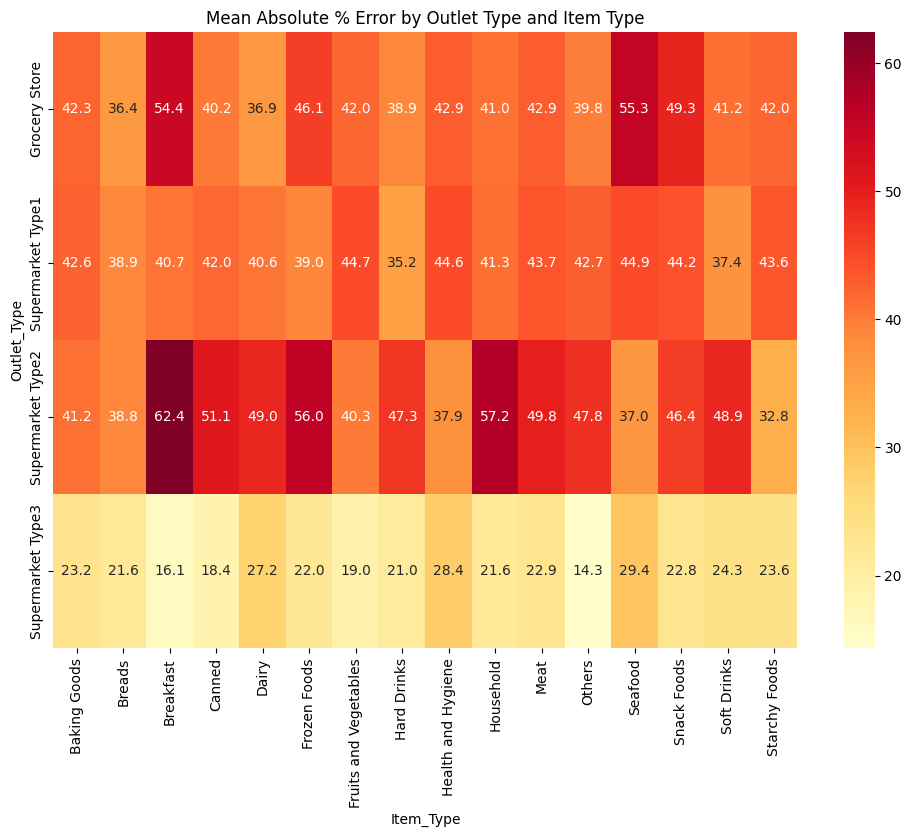

In [49]:
error_pivot = dfpred.pivot_table(
    values='AbsPercError',
    index='Outlet_Type',
    columns='Item_Type',
    aggfunc='mean'
)

plt.figure(figsize=(12, 8))
sns.heatmap(error_pivot, annot=True, fmt='.1f', cmap='YlOrRd')
plt.title('Mean Absolute % Error by Outlet Type and Item Type')
plt.show()

Residual Analysis:
Mean residual %: 12.8%
Overpredict (>0): 3756 cases
Underpredict (<0): 4767 cases


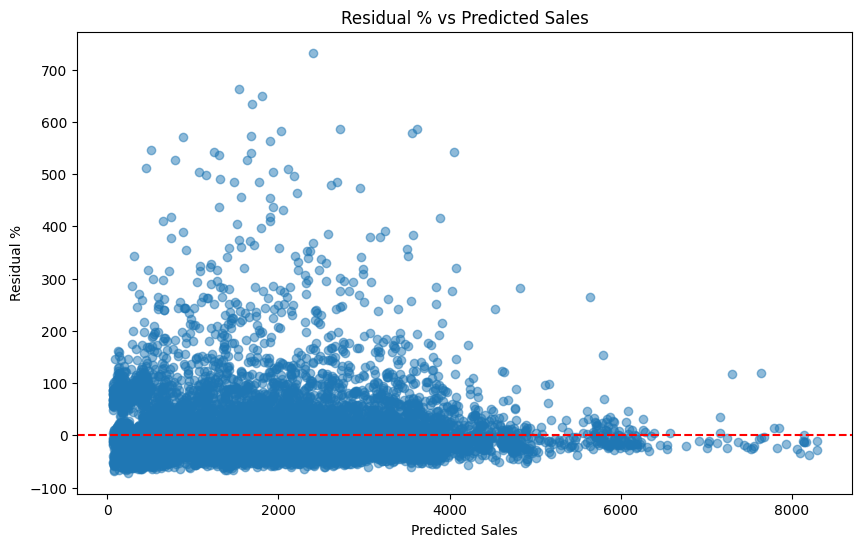

In [52]:
dfpred['Residual'] = dfpred['Pred_Item_Outlet_Sales'] - dfpred['Item_Outlet_Sales']
dfpred['Residual_Pct'] = (dfpred['Residual'] / dfpred['Item_Outlet_Sales']) * 100

# Check for systematic over/under prediction
print("Residual Analysis:")
print(f"Mean residual %: {dfpred['Residual_Pct'].mean():.1f}%")
print(f"Overpredict (>0): {(dfpred['Residual_Pct'] > 0).sum()} cases")
print(f"Underpredict (<0): {(dfpred['Residual_Pct'] < 0).sum()} cases")

# Plot residuals vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(dfpred['Pred_Item_Outlet_Sales'], dfpred['Residual_Pct'], alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Sales')
plt.ylabel('Residual %')
plt.title('Residual % vs Predicted Sales')
plt.show()

In [19]:
dfpred.pivot_table(index='Item_Identifier', values='AbsPercError', aggfunc=['median','mean','std','count']).sort_values(by=('median', 'AbsPercError'), ascending=False).head(20)

,median,mean,std,count
,AbsPercError,AbsPercError,AbsPercError,AbsPercError
Item_Identifier,,,,
FDI36,185.880,185.880000,184.540728,2
FDL25,113.480,120.026667,70.558154,3
NCS38,99.350,109.502500,87.587350,4
NCR42,86.580,146.333333,107.311350,3
NCF06,85.840,125.216667,97.643363,3
DRH11,83.660,79.170000,54.179422,4
FDV31,77.300,95.553333,45.091696,3
NCK06,73.820,71.356000,33.222112,5


In [27]:
dfpred.pivot_table(index='Item_MRP_Bins', values='AbsPercError', aggfunc=['median','mean','std','count']).sort_values(by=('median', 'AbsPercError'), ascending=False).head(20)

,median,mean,std,count
,AbsPercError,AbsPercError,AbsPercError,AbsPercError
Item_MRP_Bins,,,,
Very_Low,27.850,42.177900,54.799944,757
Premium,27.840,42.161632,57.899675,1440
Medium,26.340,41.319647,62.133522,2210
High,25.555,38.989265,52.774489,2434
Low,25.295,39.559661,55.400721,1682


In [30]:
dfpred.pivot_table(index='Price_Band_Competitors', values='AbsPercError', aggfunc=['median','mean','std','count']).sort_values(by=('median', 'AbsPercError'), ascending=False).head(20)

,median,mean,std,count
,AbsPercError,AbsPercError,AbsPercError,AbsPercError
Price_Band_Competitors,,,,
37,189.265,189.265000,76.770583,2
32,32.630,47.820789,53.190702,38
30,31.445,46.311154,67.458694,52
33,31.250,39.228947,49.420552,19
7,28.820,43.261000,56.865091,440
22,28.600,47.413355,65.983334,155
18,28.080,37.416994,44.054640,173
10,27.940,44.695887,66.284481,389


In [ ]:
dfpred.pivot_table(index='Outlet_Type', values='AbsPercError', aggfunc=['median','mean','std','count']).sort_values(by=('median', 'AbsPercError'), ascending=False).head(20)

,median,mean,std,count
,AbsPercError,AbsPercError,AbsPercError,AbsPercError
Outlet_Type,,,,
Grocery Store,37.18,42.846833,33.562657,1083
Supermarket Type2,28.14,47.262112,70.879068,928
Supermarket Type1,28.03,42.018268,59.805683,5577
Supermarket Type3,15.03,22.244727,38.439799,935


In [25]:
dfpred.pivot_table(index='Outlet_Size', values='AbsPercError', aggfunc=['median','mean','std','count']).sort_values(by=('median', 'AbsPercError'), ascending=False).head(20)

,median,mean,std,count
,AbsPercError,AbsPercError,AbsPercError,AbsPercError
Outlet_Size,,,,
Small,28.98,41.548583,52.723254,4798
High,28.72,46.424753,69.832684,932
Medium,21.74,36.798815,58.704572,2793


In [26]:
dfpred.pivot_table(index='Outlet_Location_Type', values='AbsPercError', aggfunc=['median','mean','std','count']).sort_values(by=('median', 'AbsPercError'), ascending=False).head(20)

,median,mean,std,count
,AbsPercError,AbsPercError,AbsPercError,AbsPercError
Outlet_Location_Type,,,,
Tier 1,28.98,42.618346,57.367067,2388
Tier 2,27.96,40.326409,53.918096,2785
Tier 3,22.98,39.198627,58.871328,3350


In [21]:
dfpred.pivot_table(index='Outlet_Identifier', values='AbsPercError', aggfunc=['median','mean','std','count']).sort_values(by=('median', 'AbsPercError'), ascending=False).head(20)

,median,mean,std,count
,AbsPercError,AbsPercError,AbsPercError,AbsPercError
Outlet_Identifier,,,,
OUT019,37.690,43.586458,32.918311,528
OUT010,34.830,42.143189,34.179188,555
OUT013,28.720,46.424753,69.832684,932
OUT017,28.655,39.240065,47.068209,926
OUT049,28.540,40.990355,59.316865,930
OUT018,28.140,47.262112,70.879068,928
OUT045,27.880,42.392121,56.982301,929
OUT035,26.830,39.344591,57.064189,930


In [24]:
dfpred.pivot_table(index='Item_Type', values='AbsPercError', aggfunc=['median','mean','std','count']).sort_values(by=('median', 'AbsPercError'), ascending=False).head(20)

,median,mean,std,count
,AbsPercError,AbsPercError,AbsPercError,AbsPercError
Item_Type,,,,
Snack Foods,28.125,42.619058,60.676569,1200
Breakfast,28.025,42.955545,51.962757,110
Starchy Foods,27.795,40.301284,54.191624,148
Frozen Foods,27.705,39.946939,50.078499,856
Baking Goods,27.620,40.339769,55.710142,648
Seafood,27.585,44.006875,53.589436,64
Hard Drinks,26.945,35.320935,33.894193,214
Breads,26.790,36.425857,42.321038,251


In [ ]:
dfpred.pivot_table(index='Outlet_Type', values='AbsPercError', aggfunc=['mean', 'std', 'count'])

,mean,std,count
,AbsPercError,AbsPercError,AbsPercError
Outlet_Type,,,
Grocery Store,42.846833,33.562657,1083
Supermarket Type1,42.018268,59.805683,5577
Supermarket Type2,47.262112,70.879068,928
Supermarket Type3,22.244727,38.439799,935
